In [ ]:
import numpy as np
import faiss

from faiss.contrib.datasets import SyntheticDataset 
from faiss.contrib.inspect_tools import get_NSG_neighbors
from qinco_datasets import DatasetFB_ssnpp

# ds = SyntheticDataset(d=2, nt=0, nb=101, nq=10)
ds = DatasetFB_ssnpp(basedir="/checkpoint/dsevero/data/fb_ssnpp/")
index_nsg = faiss.index_factory(ds.d, "NSG16,Flat")
index_nsg.verbose = True
database = ds.get_database()
index_nsg.add(database)
q = ds.get_queries()[8][None]    # just one query
# q = np.array([0.0, 0.0], dtype=np.float32)[None]
Dref, Iref = index_nsg.search(q, 10)
D, I, trace = index_nsg.search_and_trace(q, 10)
np.testing.assert_array_equal(I, Iref)
np.testing.assert_array_equal(D, Dref)

# at least, all result vectors should be in the trace
assert set(I.ravel().tolist()) <= set(trace)

print(trace)

In [2]:
graph = get_NSG_neighbors(index_nsg.nsg)
print('entrypoint is', index_nsg.nsg.enterpoint)

for i in range(graph.shape[0]):
    print(i, graph[i])

entrypoint is 7
0 [ 5 55  1]
1 [69 34  0]
2 [ 13 100  -1]
3 [46 87 34]
4 [91  9 -1]
5 [ 0 61 25]
6 [95 58 -1]
7 [88 23 98]
8 [10 31 75]
9 [ 4 45 26]
10 [ 8 -1 -1]
11 [28 23 79]
12 [83 17 96]
13 [39 85  2]
14 [91 97 45]
15 [48 76 49]
16 [56 61 57]
17 [43 22 89]
18 [65 60 36]
19 [28 33  9]
20 [52 73 58]
21 [67 41 28]
22 [17 96 94]
23 [11  7 72]
24 [34 56 87]
25 [79 33 55]
26 [ 9 68 -1]
27 [38 46 -1]
28 [19 11 21]
29 [51 70 -1]
30 [44 86 98]
31 [53  8 39]
32 [89 43 49]
33 [25 37 68]
34 [24 64  3]
35 [ 94 100  44]
36 [67 45 18]
37 [69 55 68]
38 [27 78 -1]
39 [13 31 -1]
40 [62 51 -1]
41 [48 21 65]
42 [85 75 96]
43 [17 32 54]
44 [92 30 35]
45 [ 9 14 36]
46 [ 3 78 27]
47 [75 81 -1]
48 [41 15 99]
49 [15 32 77]
50 [60 -1 -1]
51 [29 40 63]
52 [20 84 -1]
53 [31 85 75]
54 [86 77 22]
55 [ 0 37 25]
56 [74 16 24]
57 [72 71 51]
58 [80 84 88]
59 [99 89 83]
60 [50 97 18]
61 [64  5 16]
62 [66 40 80]
63 [66 98 51]
64 [61 34  0]
65 [18 99 41]
66 [62 63 93]
67 [21 36 -1]
68 [33 26 37]
69 [37  1  0]
70 [29 7

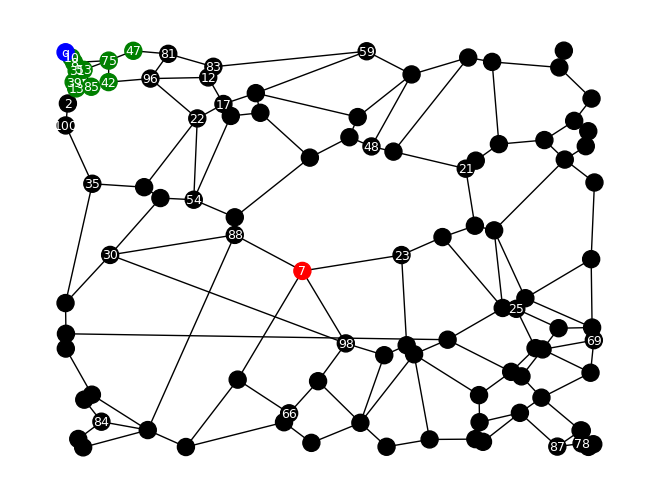

[ 88  23  98   7  48  30 100  25  69  87  84  21   2  66  54  78  13  39
  85  31  53   8  10  75  47  42  96  81  22  35  83  12  59  17]


In [3]:
%matplotlib inline
import networkx as nx
import matplotlib.pyplot as plt
from networkx.drawing.nx_agraph import graphviz_layout

assert graph.shape[0] < 200, 'database is too lage to plot!'

edge_list = list(set((v, w) for v in np.arange(graph.shape[0]) for w in graph[v] if w >= 0))
G = nx.Graph()
G.add_nodes_from(range(graph.shape[0]))
G.add_edges_from(edge_list)
G.add_node('q')

# for i in range(len(G.nodes)):
#     G.nodes[i]['label'] = str(i)


pos = {n: database[n] for n in G.nodes if n != 'q'}
pos['q'] = q[0]
# pos = graphviz_layout(G)
# pos=nx.spring_layout(G)
labels = {
    n: n
    # n: i+1
    for i, n in enumerate(trace)
}
labels['q'] = 'q'
# assert 0 not in labels.values()
# labels[index_nsg.nsg.enterpoint] = 0
node_colors = ['green' if n in Iref else 'black' for n in G.nodes]
node_colors[index_nsg.nsg.enterpoint] = 'red'
node_colors[-1] = 'blue'

nx.draw(G, labels=labels, with_labels=True, pos=pos, node_size=150, font_size=9, font_color='white', node_color=node_colors)
plt.show()
print(trace)